In [97]:
ls -al data


total 155264
drwxr-xr-x  12 joshuamelchor  staff       384 May 10 19:51 ./
drwxr-xr-x@  7 joshuamelchor  staff       224 May 10 20:48 ../
-rw-r--r--@  1 joshuamelchor  staff      6148 May 10 18:17 .DS_Store
-rw-rw----   1 joshuamelchor  staff         5 May 17  2023 cb_2020_us_cousub_500k.cpg
-rw-rw----   1 joshuamelchor  staff  17521442 May 17  2023 cb_2020_us_cousub_500k.dbf
-rw-rw----   1 joshuamelchor  staff       165 May 17  2023 cb_2020_us_cousub_500k.prj
-rw-rw----   1 joshuamelchor  staff  61558832 May 17  2023 cb_2020_us_cousub_500k.shp
-rw-r--r--@  1 joshuamelchor  staff        24 May 10 19:50 cb_2020_us_cousub_500k.shp.ea.iso.gfs
-rwxrwxrwx@  1 joshuamelchor  staff     39682 May 17  2023 cb_2020_us_cousub_500k.shp.ea.iso.xml*
-rw-r--r--@  1 joshuamelchor  staff        24 May 10 19:50 cb_2020_us_cousub_500k.shp.iso.gfs
-rwxrwxrwx   1 joshuamelchor  staff     45688 May 17  2023 cb_2020_us_cousub_500k.shp.iso.xml*
-rw-rw----   1 joshuamelchor  staff    292116 May 17  2023 cb_202

In [48]:
import matplotlib.pyplot as plt
import geopandas
import pandas as pd

states = geopandas.read_file('data/cb_2020_us_cousub_500k.shp')

states.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,29,195,22096,00767361,0600000US2919522096,2919522096,Elmwood,Elmwood township,MO,Saline County,Missouri,44,181233131,377337,"POLYGON ((-93.48978 39.06658, -93.48938 39.073..."
1,38,099,45260,01036531,0600000US3809945260,3809945260,Latona,Latona township,ND,Walsh County,North Dakota,44,90848624,2941846,"POLYGON ((-98.16255 48.36954, -98.05746 48.369..."
2,38,017,16100,01036391,0600000US3801716100,3801716100,Cornell,Cornell township,ND,Cass County,North Dakota,44,93440087,0,"POLYGON ((-97.70538 47.04981, -97.70558 47.051..."
3,38,093,22940,01036472,0600000US3809322940,3809322940,Eldridge,Eldridge township,ND,Stutsman County,North Dakota,44,90001176,2572532,"POLYGON ((-98.94567 46.97918, -98.85914 46.979..."
4,38,079,67780,01036243,0600000US3807967780,3807967780,Rolette,Rolette city,ND,Rolette County,North Dakota,25,2609731,0,"POLYGON ((-99.85266 48.6682, -99.83068 48.6681..."


In [9]:
states.crs #Coordinate Reference System

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

# Visualize the Map of the United States

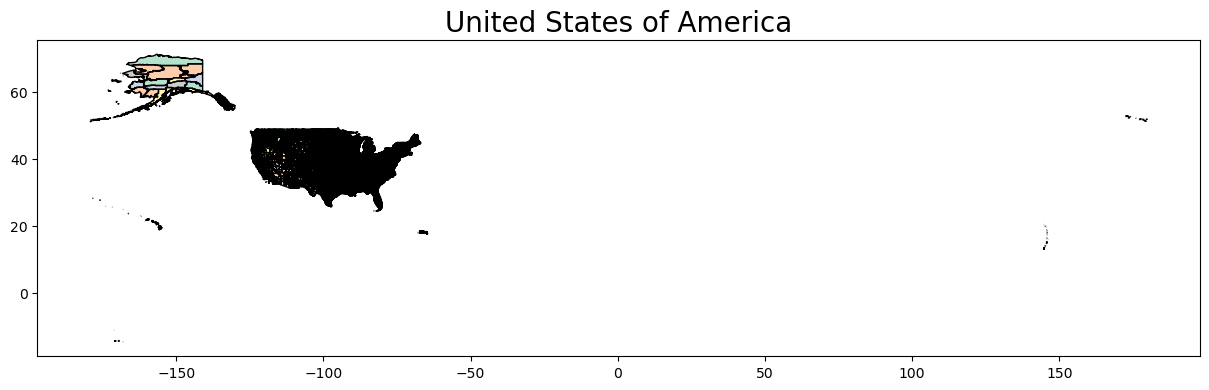

In [77]:
# Plot the entire united states including territories
fig, ax = plt.subplots(figsize=(15, 10))
states.boundary.plot(ax=ax, color='black', linewidth=1)
states.plot(ax=ax, cmap='Pastel2')
plt.title('United States of America', size=20)
plt.show()

# Visualize the Distribution of geographic data

The following w graph shows how much land mass is in each county subdivision. The first map shows counties in the continental united states to more clearly see their sizes, while the 2nd map uses a gradient color to show how much land they take up. From here you can see the biggest counties in the US by land area. While the first map will show the counties, its coloring and noise makes it hard to determine size of counties. The 2nd map reduces noise so you see just how big county sizes are.

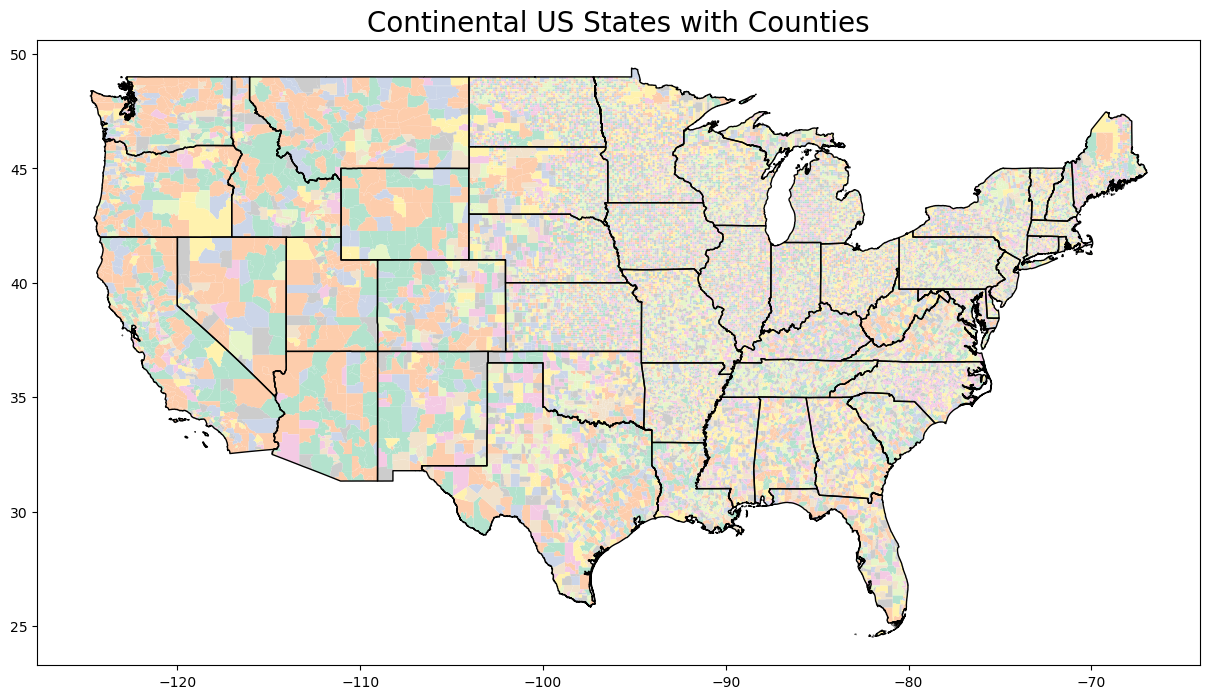

In [ ]:
# Filter out Alaska, Hawaii, and US territories 
exclude = [
    'Alaska', 'Hawaii', 'Puerto Rico', 'Guam',
    'American Samoa', 'Commonwealth of the Northern Mariana Islands', 'United States Virgin Islands'
]
continental = states[~states['STATE_NAME'].isin(exclude)]

# Plot the continental US states, not the counties
only_states = continental.dissolve(by='STATE_NAME')

# Plot the continental US states
fig, ax = plt.subplots(figsize=(15, 10))
only_states.boundary.plot(ax=ax, color='black', linewidth=1)
continental.plot(ax=ax, cmap='Pastel2')
plt.title('Continental US States with County Subdivision', size=20)
plt.show()

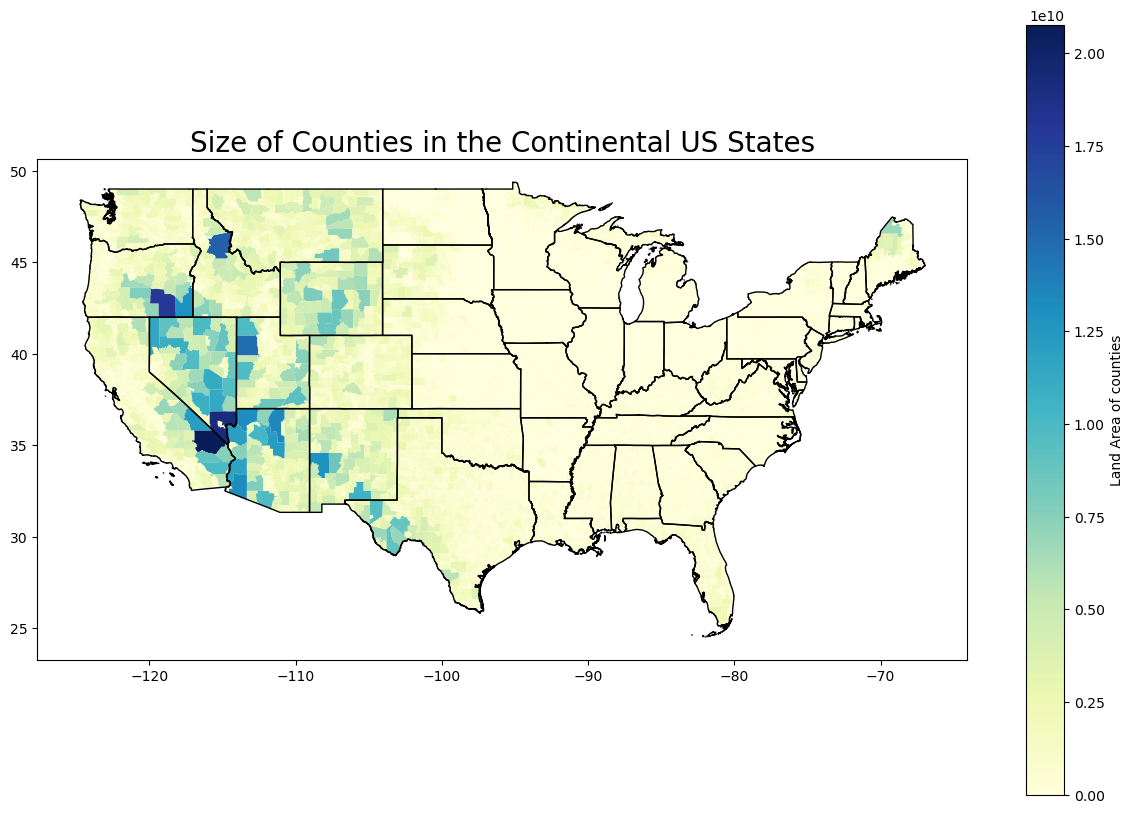

In [ ]:
# Filter out Alaska, Hawaii, and US territories 
exclude = [
    'Alaska', 'Hawaii', 'Puerto Rico', 'Guam',
    'American Samoa', 'Commonwealth of the Northern Mariana Islands', 'United States Virgin Islands'
]
continental = states[~states['STATE_NAME'].isin(exclude)]

# Get the states without the counties for boardering
only_states = continental.dissolve(by='STATE_NAME')

# Plot the continental US states
fig, ax = plt.subplots(figsize=(15, 10))
only_states.boundary.plot(ax=ax, color='black', linewidth=1)
continental.plot(ax=ax, column='ALAND', cmap='YlGnBu', legend=True, legend_kwds={'label': "Land Area of counties"})
plt.title('Size of County Subdivision in the Continental US States', size=20)
plt.show()

# Size of a state by land area

The following pie chart shows the top 10 biggest states by land area. The graph highlights which states has the biggest land area, and by how much. Here you can see that while alaska is known to be the biggest state, you can see also that alaska is about double the height of the 2nd biggest state; texas. People can learn just how big different states are when not distorted by the Mercator projection map which is great for navigation, but sacrifices true sizes of land.

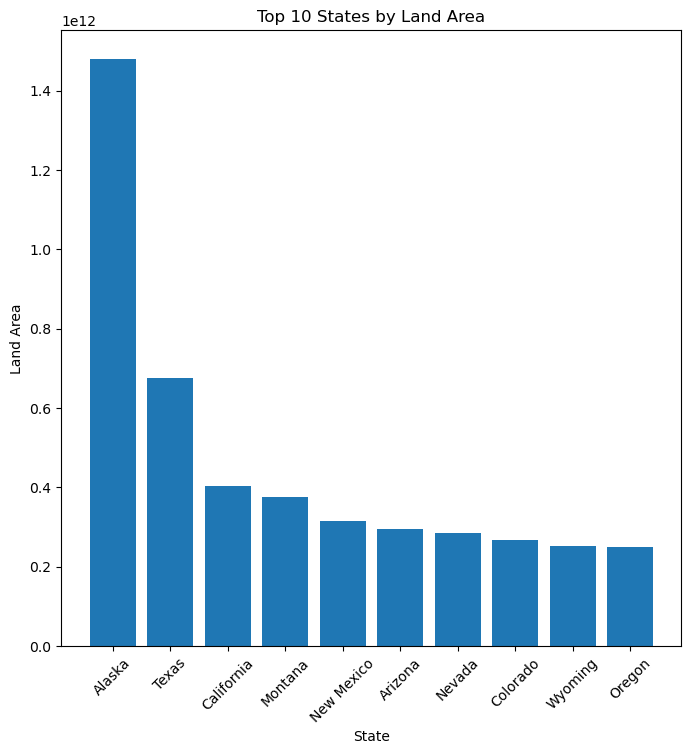

In [114]:
# Group each state by landmass 
state_area = states.groupby('STATE_NAME')['ALAND'].sum().reset_index()

#get top 10 states by area
top_5_states = state_area.sort_values('ALAND', ascending=False).head(10)

# Plot the top 10 states
fig, ax = plt.subplots(figsize=(8, 8))
plt.bar(top_5_states['STATE_NAME'], top_5_states['ALAND'])
plt.xlabel('State')
plt.xticks(rotation=45)
plt.ylabel('Land Area')
plt.title('Top 10 States by Land Area')
plt.show()

# State Water Area

The following pie chart shows the top 10 biggest states by water area. The graph highlights which states has the biggest water area, and by how much. Here you can see the #1 by a lot is still alaska because of it's size and how much water it boarders. similar with florida. This shows how landmass can impact how much water a state has access to. This is important for people with jobs where water is important such as agriculture.

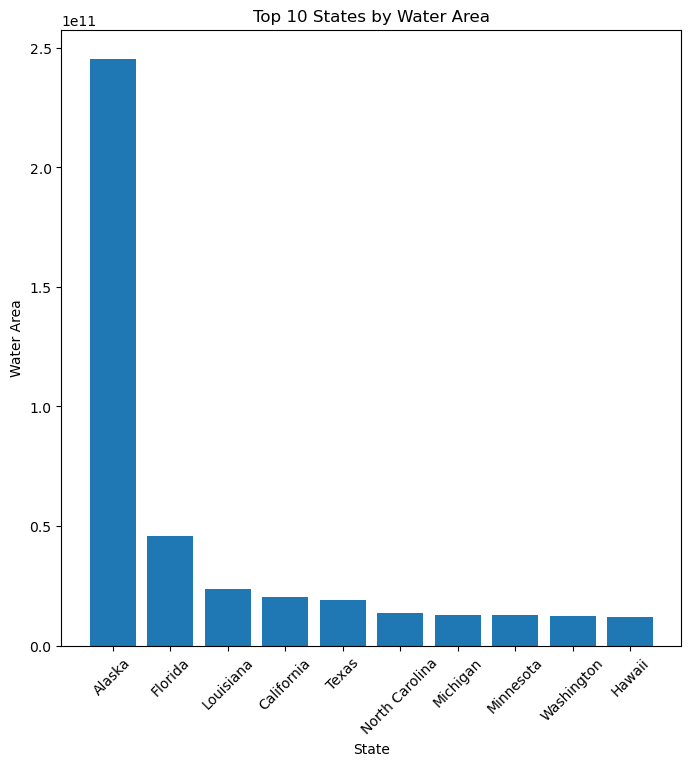

In [113]:
# Group each state by water area 
state_area = states.groupby('STATE_NAME')['AWATER'].sum().reset_index()

#get top 10 states by area
top_5_states = state_area.sort_values('AWATER', ascending=False).head(10)

# Plot the top 10 states
fig, ax = plt.subplots(figsize=(8, 8))
plt.bar(top_5_states['STATE_NAME'], top_5_states['AWATER'])
plt.xlabel('State')
plt.xticks(rotation=45)
plt.ylabel('Water Area')
plt.title('Top 10 States by Water Area')
plt.show()

# States With the Most Counties

The following chart shows the top 10 states with the most counties in a bar graph. Here you can Texas has the most counties making it an outlier. Most of the states in the graph below do not appear in the top 10 biggest states which is an interesting contrast. While this is not a direct way to learn about a state, it can help to further explain culture across different states. For example, it may be the case that small town values are prominent in southern states so it could be that counties are smaller.

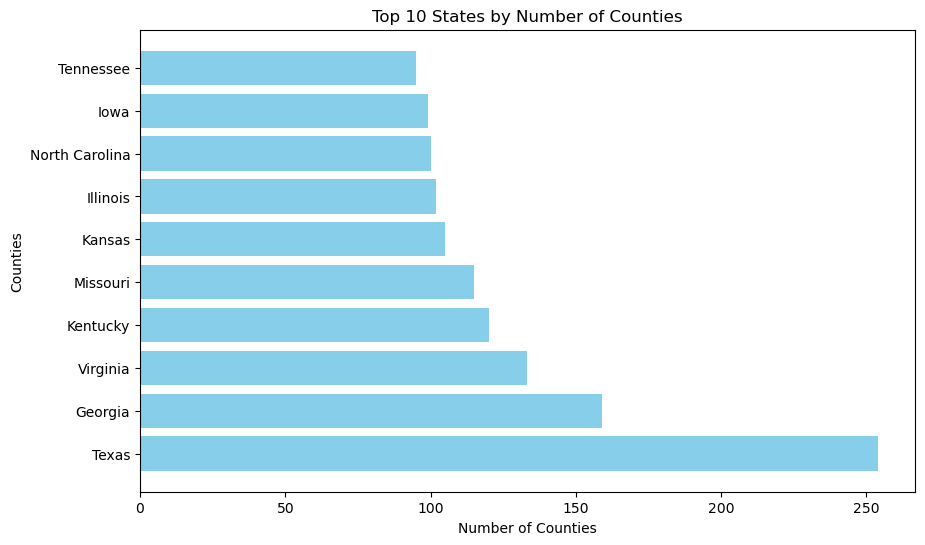

In [ ]:
# Group each state by number of counties 
county = states.groupby('STATE_NAME')['COUNTYFP'].nunique().reset_index(name='COUNTY_COUNT')

# get top 10 states by number of counties
top10_counties = county.sort_values('COUNTY_COUNT', ascending=False).head(10)

# Plot the top 10 states
plt.figure(figsize=(10, 6))
plt.barh(top10_counties['STATE_NAME'], top10_counties['COUNTY_COUNT'], color='skyblue')
plt.ylabel('Counties')
plt.xlabel('Number of Counties')
plt.title('Top 10 States by Number of Counties')
plt.show()

# Washington state county
Here you can see a histogram of the distribution of land in washington state 

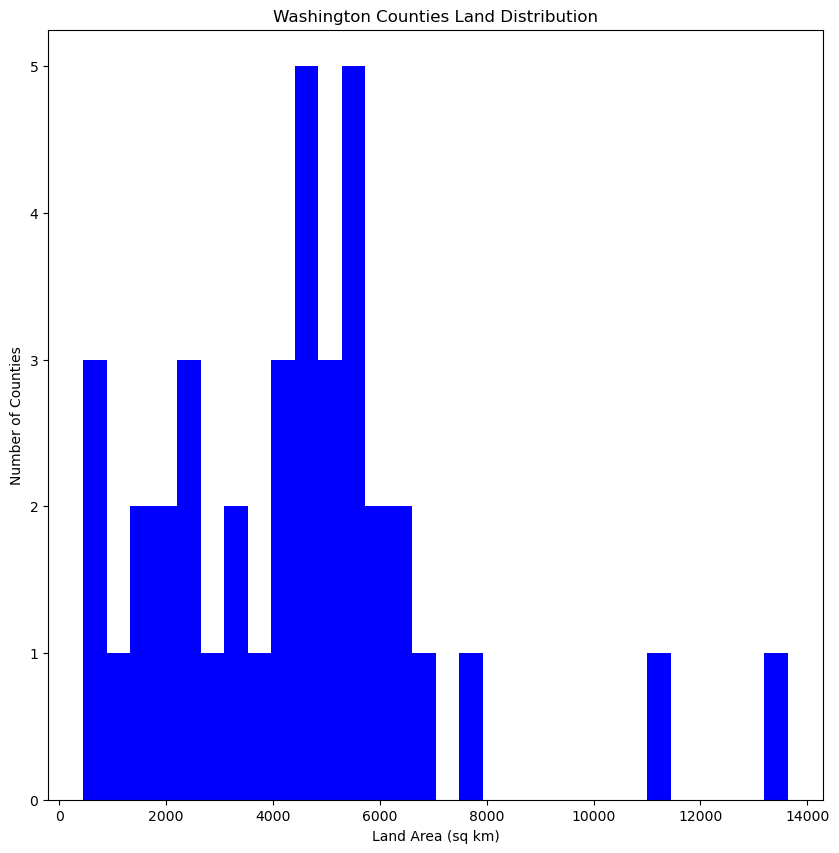

In [119]:
# Grab Washington state
washington = states[states['STATE_NAME'] == 'Washington']

# Group Washington state by land area
washington_county = washington.groupby(['COUNTYFP'])['ALAND'].sum().reset_index()

# Plot Washington state land area distribution
plt.figure(figsize=(10, 10))
plt.hist(washington_county['ALAND'] / 1e6, bins=30, color='blue', label='Land Area')
plt.xlabel('Land Area (sq km)')
plt.ylabel('Number of Counties')
plt.title('Washington Counties Land Distribution')
plt.show()

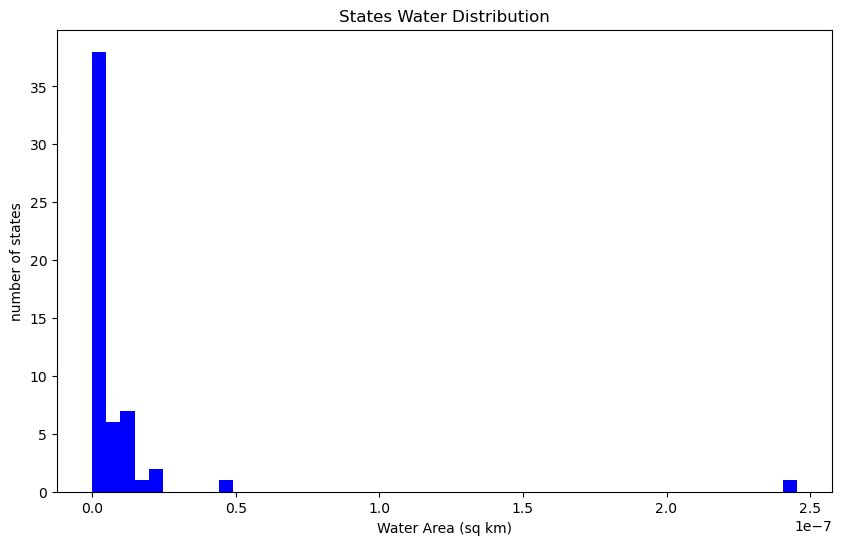

In [57]:
state_area['AWATER'] = state_area['AWATER'] / 1e6

plt.figure(figsize=(10, 6))
plt.hist(state_area['AWATER'], bins=50, color='blue', label='Water Area')
plt.xlabel('Water Area (sq km)')
plt.ylabel('number of states')
plt.title('States Water Distribution')
plt.show()
